In [1]:
# !pip install sklearn
import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re


### List of stations and geographical coordinates


Data downloaded from wikipedia
https://en.wikipedia.org/wiki/List_of_Chicago_%22L%22_stations

In [2]:
stations=pd.read_csv("List_of_Station_Chicago.csv")
stations.head()

,Station,Lines,Transfers,Location,Opened,Structure
0,O'Hare,Blue,O'Hare: ATS Airport Transit System,O'Hare,"September 3, 1984[12]",Underground
1,Rosemont,Blue,—,Rosemont,"February 27, 1983[13]",Expressway median
2,Cumberland,Blue,—,O'Hare,"February 27, 1983[13]",Expressway median
3,Harlem,Blue,—,Norwood Park,"February 27, 1983[13]",Expressway median
4,Jefferson Park,Blue,Metra: UP-NW,Jefferson Park,"February 1, 1970[14]",Expressway median


In [3]:
stations.Lines.value_counts()

Blue                              33
Red                               29
Green                             22
Pink                              11
Brown                             11
Purple                             8
Orange                             7
Brown Purple                       6
Brown Orange Pink Purple           4
Brown Green Orange Pink Purple     4
Green Pink                         3
Yellow                             2
Brown Purple Red                   2
Red Purple  Yellow                 1
Green Orange                       1
Red Purple                         1
Name: Lines, dtype: int64

In [4]:
# !pip3 install opencage
from opencage.geocoder import OpenCageGeocode
key = '20b19d9ca52c4af8b4ee86a53b693aa6'
geocoder = OpenCageGeocode(key)

In [5]:
station_dict={}
import time
start = time.time()

for i, j in zip(stations.Station, stations.Location):
    address = j + ', ' + 'Chicago, Illinois,United States'
    location = geocoder.geocode(address)
    latlng = location[0]['geometry']
    station_dict[i]=latlng
    print(i,latlng,str(time.time()-start)+'s')
station_dict

O'Hare {'lat': 41.973101, 'lng': -87.9067679} 3.7447617053985596s
Rosemont {'lat': 41.995343, 'lng': -87.7337447} 15.120142698287964s
Cumberland {'lat': 41.973101, 'lng': -87.9067679} 17.906909942626953s
Harlem {'lat': 41.9855895, 'lng': -87.8005817} 21.244351863861084s
Jefferson Park {'lat': 41.9697375, 'lng': -87.7631179} 26.831483840942383s
Montrose {'lat': 41.953365, 'lng': -87.7364471} 62.180675745010376s
Irving Park {'lat': 41.953365, 'lng': -87.7364471} 71.80925798416138s
Addison {'lat': 41.953365, 'lng': -87.7364471} 74.99111294746399s
Belmont {'lat': 41.9389208, 'lng': -87.711168} 78.75988292694092s
Logan Square {'lat': 41.9285683, 'lng': -87.7067931} 81.94721364974976s
California {'lat': 41.925221, 'lng': -87.7013096} 103.98984980583191s
Western {'lat': 41.925221, 'lng': -87.7013096} 107.89699363708496s
Damen {'lat': 41.9078018, 'lng': -87.6781551} 121.80561184883118s
Division {'lat': 41.905809, 'lng': -87.672125} 125.76952171325684s
Chicago {'lat': 41.9014213, 'lng': -87.686

Berwyn {'lat': 41.9833689, 'lng': -87.6639516} 611.6298229694366s
Argyle {'lat': 41.9732234, 'lng': -87.6587651} 619.8557238578796s
Lawrence {'lat': 41.9666299, 'lng': -87.6555458} 622.9298779964447s
Wilson  Ⓣ {'lat': 41.9666299, 'lng': -87.6555458} 626.3096237182617s
Sheridan {'lat': 41.94705, 'lng': -87.6554288} 629.5842196941376s
Addison {'lat': 41.947022, 'lng': -87.6564773} 638.9026448726654s
North/Clybourn {'lat': 41.9000327, 'lng': -87.6344975} 650.2691369056702s
Clark/Division {'lat': 41.9000327, 'lng': -87.6344975} 651.9580228328705s
Chicago {'lat': 41.9000327, 'lng': -87.6344975} 654.0718188285828s
Grand {'lat': 41.890808, 'lng': -87.611113} 657.2323429584503s
Lake  Ⓣ {'lat': 41.8788844, 'lng': -87.6271806} 665.7333438396454s
Monroe {'lat': 41.8816094, 'lng': -87.6294574} 668.3359048366547s
Jackson  Ⓣ {'lat': 41.8788844, 'lng': -87.6271806} 672.0827038288116s
Harrison {'lat': 41.8617846, 'lng': -87.6261213} 673.801837682724s
Roosevelt  Ⓣ {'lat': 41.8566999, 'lng': -87.6247738

{"O'Hare": {'lat': 41.973101, 'lng': -87.9067679},
 'Rosemont': {'lat': 41.995343, 'lng': -87.7337447},
 'Cumberland': {'lat': 41.973101, 'lng': -87.9067679},
 'Harlem': {'lat': 41.727329, 'lng': -87.616704},
 'Jefferson Park': {'lat': 41.9697375, 'lng': -87.7631179},
 'Montrose': {'lat': 41.9655913, 'lng': -87.6667239},
 'Irving Park': {'lat': 41.9561073, 'lng': -87.6791596},
 'Addison': {'lat': 41.947022, 'lng': -87.6564773},
 'Belmont': {'lat': 41.9389208, 'lng': -87.711168},
 'Logan Square': {'lat': 41.9285683, 'lng': -87.7067931},
 'California': {'lat': 41.861876, 'lng': -87.647786},
 'Western': {'lat': 41.8541996, 'lng': -87.6656086},
 'Damen': {'lat': 41.951758, 'lng': -87.7107659},
 'Division': {'lat': 41.905809, 'lng': -87.672125},
 'Chicago': {'lat': 41.9000327, 'lng': -87.6344975},
 'Grand': {'lat': 41.890808, 'lng': -87.611113},
 'Clark/Lake[b]  Ⓣ': {'lat': 41.8788844, 'lng': -87.6271806},
 'Washington Ⓣ': {'lat': 41.8788844, 'lng': -87.6271806},
 'Monroe': {'lat': 41.88160

In [6]:
latlng=pd.DataFrame.from_dict(station_dict,orient='index').reset_index()
latlng.columns=['Station','latitude','longitude']
station_new=pd.merge(stations,latlng,how='left', on=['Station'])
station_new

,Station,Lines,Transfers,Location,Opened,Structure,latitude,longitude
0,O'Hare,Blue,O'Hare: ATS Airport Transit System,O'Hare,"September 3, 1984[12]",Underground,41.973101,-87.906768
1,Rosemont,Blue,—,Rosemont,"February 27, 1983[13]",Expressway median,41.995343,-87.733745
2,Cumberland,Blue,—,O'Hare,"February 27, 1983[13]",Expressway median,41.973101,-87.906768
3,Harlem,Blue,—,Norwood Park,"February 27, 1983[13]",Expressway median,41.727329,-87.616704
4,Jefferson Park,Blue,Metra: UP-NW,Jefferson Park,"February 1, 1970[14]",Expressway median,41.969738,-87.763118
...,...,...,...,...,...,...,...,...
140,79th,Red,—,Chatham,"September 28, 1969[68]",Expressway median,41.741145,-87.612548
141,87th,Red,—,Chatham,"September 28, 1969[68]",Expressway median,41.741145,-87.612548
142,95th/Dan Ryan,Red,—,Roseland,"September 28, 1969[68]",Expressway median,41.701979,-87.625881
143,Dempster–Skokie,Yellow,—,Skokie,"March 28, 1925[69]",At-grade,42.301387,-87.871313


In [7]:
station_new.to_csv('station_latlng.csv')

In [6]:
station_new=pd.read_csv('station_latlng.csv')

Neighbourhood df download from wiki
https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

In [5]:
neighbours = pd.read_csv('List_of_neighborhoods_in_Chicago.csv')
neighbours.head()

,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


In [14]:
neig_dict={}
import time
start = time.time()

for i in neighbours.Neighborhood:
    address = i + ', ' + 'Chicago, Illinois,United States'
    location = geocoder.geocode(address)
    latlng = location[0]['geometry']
    neig_dict[i]=latlng
    print(i,latlng,str(time.time()-start)+'s')
neig_dict

Albany Park {'lat': 41.9719367, 'lng': -87.7161739} 3.2264668941497803s
Altgeld Gardens {'lat': 41.6548637, 'lng': -87.6004462} 11.95927095413208s
Andersonville {'lat': 41.9771393, 'lng': -87.6692734} 14.691755771636963s
Archer Heights {'lat': 41.8114215, 'lng': -87.7261651} 17.756582975387573s
Armour Square {'lat': 41.8400333, 'lng': -87.633107} 19.730741024017334s
Ashburn {'lat': 41.7475332, 'lng': -87.7111628} 25.73625087738037s
Ashburn Estates {'lat': 41.88531, 'lng': -87.62213} 28.615612030029297s
Auburn Gresham {'lat': 41.7433872, 'lng': -87.6560416} 32.03937101364136s
Avalon Park {'lat': 41.7450346, 'lng': -87.5886584} 34.97990107536316s
Avondale {'lat': 41.9389208, 'lng': -87.711168} 41.917022943496704s
Avondale Gardens {'lat': 41.9389208, 'lng': -87.711168} 44.763060092926025s
Back of the Yards {'lat': 41.8075332, 'lng': -87.6661628} 52.336265087127686s
Belmont Central {'lat': 41.9397964, 'lng': -87.6533276} 54.78774094581604s
Belmont Gardens {'lat': 41.9397964, 'lng': -87.653

Lincoln Park {'lat': 41.9402976, 'lng': -87.6381171} 498.8368000984192s
Lincoln Square {'lat': 41.9759898, 'lng': -87.6896163} 503.5835931301117s
Lithuanian Plaza {'lat': 41.6869288, 'lng': -87.7306849} 506.39634108543396s
Little Italy {'lat': 41.873733, 'lng': -87.658413} 509.4529318809509s
Little Village {'lat': 41.861876, 'lng': -87.647786} 512.9158427715302s
Logan Square {'lat': 41.925221, 'lng': -87.7013096} 521.0249030590057s
Longwood Manor {'lat': 41.6903981, 'lng': -87.6721901} 525.719979763031s
The Loop {'lat': 41.8788844, 'lng': -87.6271806} 528.0787301063538s
Lower West Side {'lat': 41.8476197, 'lng': -87.6717742} 530.8883669376373s
Loyola {'lat': 42.0013525, 'lng': -87.6613062} 535.3763189315796s
Magnificent Mile {'lat': 41.8945229, 'lng': -87.624228} 539.1864879131317s
Margate Park {'lat': 41.972484, 'lng': -87.650708} 540.9576017856598s
Marquette Park {'lat': 41.7685506, 'lng': -87.7028826} 542.4961400032043s
Marshall Square {'lat': 41.8522013, 'lng': -87.6940542} 544.011

West Englewood {'lat': 41.7780891, 'lng': -87.6667177} 942.7696659564972s
West Garfield Park {'lat': 41.8805878, 'lng': -87.7292227} 946.9433591365814s
West Humboldt Park {'lat': 41.9057668, 'lng': -87.7041737} 950.1975078582764s
West Lakeview {'lat': 41.9439185, 'lng': -87.6540759} 959.041589975357s
West Lawn {'lat': 41.7728107, 'lng': -87.722275} 964.7815239429474s
West Loop {'lat': 41.8823318, 'lng': -87.6385777} 966.5102219581604s
West Morgan Park {'lat': 41.6903117, 'lng': -87.6667156} 968.3290750980377s
West Pullman {'lat': 41.6750456, 'lng': -87.637823} 972.8733577728271s
West Ridge {'lat': 42.0035482, 'lng': -87.6962426} 976.9606161117554s
West Rogers Park {'lat': 42.0105314, 'lng': -87.6707482} 980.0367429256439s
West Town {'lat': 41.9014213, 'lng': -87.6861661} 983.0497689247131s
West Woodlawn {'lat': 41.7794786, 'lng': -87.599493} 986.5972719192505s
Wicker Park {'lat': 41.9078018, 'lng': -87.6781551} 991.178827047348s
Wildwood {'lat': 42.0046908, 'lng': -87.7759245} 993.2226

{'Albany Park': {'lat': 41.9719367, 'lng': -87.7161739},
 'Altgeld Gardens': {'lat': 41.6548637, 'lng': -87.6004462},
 'Andersonville': {'lat': 41.9771393, 'lng': -87.6692734},
 'Archer Heights': {'lat': 41.8114215, 'lng': -87.7261651},
 'Armour Square': {'lat': 41.8400333, 'lng': -87.633107},
 'Ashburn': {'lat': 41.7475332, 'lng': -87.7111628},
 'Ashburn Estates': {'lat': 41.88531, 'lng': -87.62213},
 'Auburn Gresham': {'lat': 41.7433872, 'lng': -87.6560416},
 'Avalon Park': {'lat': 41.7450346, 'lng': -87.5886584},
 'Avondale': {'lat': 41.9389208, 'lng': -87.711168},
 'Avondale Gardens': {'lat': 41.9389208, 'lng': -87.711168},
 'Back of the Yards': {'lat': 41.8075332, 'lng': -87.6661628},
 'Belmont Central': {'lat': 41.9397964, 'lng': -87.6533276},
 'Belmont Gardens': {'lat': 41.9397964, 'lng': -87.6533276},
 'Belmont Heights': {'lat': 41.940104, 'lng': -87.640367},
 'Belmont Terrace': {'lat': 41.9397964, 'lng': -87.6533276},
 'Beverly': {'lat': 41.7181532, 'lng': -87.6717674},
 'Beve

In [16]:
latlng=pd.DataFrame.from_dict(neig_dict,orient='index').reset_index()
latlng.columns=['Neighborhood','latitude','longitude']

In [17]:
neighbours_new=pd.merge(neighbours,latlng,how='left', on=['Neighborhood'])

In [18]:
neighbours_new.head()

,Neighborhood,Community area,latitude,longitude
0,Albany Park,Albany Park,41.971937,-87.716174
1,Altgeld Gardens,Riverdale,41.654864,-87.600446
2,Andersonville,Edgewater,41.977139,-87.669273
3,Archer Heights,Archer Heights,41.811422,-87.726165
4,Armour Square,Armour Square,41.840033,-87.633107


In [8]:
# station_new.to_csv("station.csv")
# neighbours_new.to_csv("neighbours.csv")
# reading saved data
station_new = pd.read_csv("station.csv")
neighbours_new = pd.read_csv("neighbours.csv")

In [9]:
neighbours_new.shape

(246, 5)

In [39]:
# CLIENT_ID="1QWBEEEJMMQ1TD2ZOOO31GHSEWRJ24N3Y40EHQR2ZEH0PI4A"
# CLIENT_SECRET="KXTQUUEMPXA1XCMWSEPJ1PN05PCHU0NYNFBHR51LCRA5V3JD"
VERSION="20191222"
CLIENT_ID = 'WGY32GYMOR10DO0A4VJZ3YDJML5H4PFBONGBH0SNCCNF2QR0' # confidential
CLIENT_SECRET= 'LIUOD1RYNQI5QA1AVDK302Z5ENCRIBZNAMY2GYHORMV1RWAB' # confidential

In [11]:
#create map of Chicago with all neighbourhood
# 41.8781° N, 87.6298° W
map_chicago_neig = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for neighborhood, lat, lng in zip(neighbours_new['Neighborhood'], neighbours_new['latitude'],neighbours_new['longitude']):
    folium.Circle(
        [lat,lng],
        popup=neighborhood,
        radius=20,
        color='red'
    ).add_to(map_chicago_neig)  
map_chicago_neig

In [12]:
#create map of Chicago with all station
# 41.8781° N, 87.6298° W
map_chicago_station = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for station, lat, lng in zip(station_new['Station'], station_new['latitude'],station_new['longitude']):
    folium.Circle(
        [lat,lng],
        popup=station,
        radius=20,
        color='blue'
    ).add_to(map_chicago_station)  
map_chicago_station

### Methodology
Using Foursquare API to get Get top categories and explore

In [40]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url,timeout=10).json()

In [41]:
len(results['response']['categories'])

10

In [42]:
categories_list = []
# print the top 5 categories and their IDs and add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)
categories_list = categories_list[:5]

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [43]:
categories_list

[('Arts & Entertainment', '4d4b7104d754a06370d81259'),
 ('College & University', '4d4b7105d754a06372d81259'),
 ('Event', '4d4b7105d754a06373d81259'),
 ('Food', '4d4b7105d754a06374d81259'),
 ('Nightlife Spot', '4d4b7105d754a06376d81259')]

In [44]:
def get_venues_count(coord, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                coord,
                radius,
                categoryId)
    return requests.get(explore_url, timeout=10).json()['response']['totalResults']


In [16]:
#Create new dataframe to store venues data
station_venues_df = station_new.copy()
for c in categories_list:
    station_venues_df[c[0]] = 0

station_venues_df.head()

,Unnamed: 0,Unnamed: 0.1,Station,Lines,Transfers,Location,Opened,Structure,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,0,O'Hare,Blue,O'Hare: ATS Airport Transit System,O'Hare,"September 3, 1984[12]",Underground,41.973101,-87.906768,0,0,0,0,0,0,0,0,0,0
1,1,1,Rosemont,Blue,—,Rosemont,"February 27, 1983[13]",Expressway median,41.995343,-87.733745,0,0,0,0,0,0,0,0,0,0
2,2,2,Cumberland,Blue,—,O'Hare,"February 27, 1983[13]",Expressway median,41.973101,-87.906768,0,0,0,0,0,0,0,0,0,0
3,3,3,Harlem,Blue,—,Norwood Park,"February 27, 1983[13]",Expressway median,41.727329,-87.616704,0,0,0,0,0,0,0,0,0,0
4,4,4,Jefferson Park,Blue,Metra: UP-NW,Jefferson Park,"February 1, 1970[14]",Expressway median,41.969738,-87.763118,0,0,0,0,0,0,0,0,0,0


In [45]:
#Request number of venues, store result as CSV
import time
for i, row in station_venues_df.iterrows():
    if i>23:
        try:
            for c in categories_list: 
                coord = str(station_venues_df.latitude.iloc[i])+","+ str(station_venues_df.longitude.iloc[i])
                station_venues_df.loc[i, c[0]] = get_venues_count(coord, radius=1000, categoryId=c[1])
                print(c, station_venues_df.loc[i, c[0]])
                station_venues_df.to_csv('station_venues.csv')
        except:
            print("Connection refused by the server..")
            print("Let me sleep for 5 seconds")
            print("ZZzzzz...")
            time.sleep(100)
            print("Was a nice sleep, now let me continue...")
            continue

('Arts & Entertainment', '4d4b7104d754a06370d81259') 26
('College & University', '4d4b7105d754a06372d81259') 43
('Event', '4d4b7105d754a06373d81259') 1
('Food', '4d4b7105d754a06374d81259') 60
('Nightlife Spot', '4d4b7105d754a06376d81259') 34
('Arts & Entertainment', '4d4b7104d754a06370d81259') 10
('College & University', '4d4b7105d754a06372d81259') 2
('Event', '4d4b7105d754a06373d81259') 1
('Food', '4d4b7105d754a06374d81259') 94
('Nightlife Spot', '4d4b7105d754a06376d81259') 13
('Arts & Entertainment', '4d4b7104d754a06370d81259') 22
('College & University', '4d4b7105d754a06372d81259') 3
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 18
('Nightlife Spot', '4d4b7105d754a06376d81259') 5
('Arts & Entertainment', '4d4b7104d754a06370d81259') 1
('College & University', '4d4b7105d754a06372d81259') 4
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 19
('Nightlife Spot', '4d4b7105d754a06376d81259') 4
('Arts & Entertainment', '4d4b7104d754

('Arts & Entertainment', '4d4b7104d754a06370d81259') 110
('College & University', '4d4b7105d754a06372d81259') 145
('Event', '4d4b7105d754a06373d81259') 3
('Food', '4d4b7105d754a06374d81259') 240
('Nightlife Spot', '4d4b7105d754a06376d81259') 108
('Arts & Entertainment', '4d4b7104d754a06370d81259') 110
('College & University', '4d4b7105d754a06372d81259') 145
('Event', '4d4b7105d754a06373d81259') 3
('Food', '4d4b7105d754a06374d81259') 240
('Nightlife Spot', '4d4b7105d754a06376d81259') 108
('Arts & Entertainment', '4d4b7104d754a06370d81259') 6
('College & University', '4d4b7105d754a06372d81259') 1
('Event', '4d4b7105d754a06373d81259') 1
('Food', '4d4b7105d754a06374d81259') 34
('Nightlife Spot', '4d4b7105d754a06376d81259') 9
('Arts & Entertainment', '4d4b7104d754a06370d81259') 6
('College & University', '4d4b7105d754a06372d81259') 1
('Event', '4d4b7105d754a06373d81259') 1
('Food', '4d4b7105d754a06374d81259') 34
('Nightlife Spot', '4d4b7105d754a06376d81259') 9
('Arts & Entertainment', '4d4b

('College & University', '4d4b7105d754a06372d81259') 1
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 60
('Nightlife Spot', '4d4b7105d754a06376d81259') 9
('Arts & Entertainment', '4d4b7104d754a06370d81259') 1
('College & University', '4d4b7105d754a06372d81259') 3
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 9
('Nightlife Spot', '4d4b7105d754a06376d81259') 7
('Arts & Entertainment', '4d4b7104d754a06370d81259') 1
('College & University', '4d4b7105d754a06372d81259') 3
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 9
('Nightlife Spot', '4d4b7105d754a06376d81259') 7
('Arts & Entertainment', '4d4b7104d754a06370d81259') 3
('College & University', '4d4b7105d754a06372d81259') 4
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 18
('Nightlife Spot', '4d4b7105d754a06376d81259') 5
('Arts & Entertainment', '4d4b7104d754a06370d81259') 1
('College & University', '4d4b7105d754a06372d8

('College & University', '4d4b7105d754a06372d81259') 93
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 198
('Nightlife Spot', '4d4b7105d754a06376d81259') 100
('Arts & Entertainment', '4d4b7104d754a06370d81259') 44
('College & University', '4d4b7105d754a06372d81259') 93
('Event', '4d4b7105d754a06373d81259') 0
('Food', '4d4b7105d754a06374d81259') 198
('Nightlife Spot', '4d4b7105d754a06376d81259') 100
('Arts & Entertainment', '4d4b7104d754a06370d81259') 25
('College & University', '4d4b7105d754a06372d81259') 49
('Event', '4d4b7105d754a06373d81259') 1
('Food', '4d4b7105d754a06374d81259') 113
('Nightlife Spot', '4d4b7105d754a06376d81259') 43
('Arts & Entertainment', '4d4b7104d754a06370d81259') 110
('College & University', '4d4b7105d754a06372d81259') 145
('Event', '4d4b7105d754a06373d81259') 3
('Food', '4d4b7105d754a06374d81259') 240
('Nightlife Spot', '4d4b7105d754a06376d81259') 108
('Arts & Entertainment', '4d4b7104d754a06370d81259') 111
('College & University

In [73]:
station_venues_df = pd.read_csv('station_venues.csv')
station_venues_df = station_venues_df.drop(['Opened','Transfers',
                        'Outdoors & Recreation',
                        'Professional & Other Places',
                        'Residence','Shop & Service',
                        'Travel & Transport'
                       ], axis =1)

Find lication and station with the largest number of "Arts & Entertainment"

In [74]:
station_venues_df[station_venues_df['Arts & Entertainment'] == max(station_venues_df['Arts & Entertainment'])]

,Station,Lines,Location,Structure,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot
18,Monroe,Blue,The Loop,Underground,41.881609,-87.629457,111,146,5,239,87
52,Washington/Wells Ⓣ,Brown Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
54,LaSalle/Van Buren,Brown Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
56,Adams/Wabash Ⓣ,Brown Green Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
57,Washington/​Wabash,Brown Green Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
130,Monroe,Red,The Loop,Underground,41.881609,-87.629457,111,146,5,239,87


We can see *The Loop* has most of the Arts & Entertainment, then find the top location for the rest categories

In [75]:
station_venues_df[station_venues_df['College & University'] == max(station_venues_df['College & University'])]

,Station,Lines,Location,Structure,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot
18,Monroe,Blue,The Loop,Underground,41.881609,-87.629457,111,146,5,239,87
52,Washington/Wells Ⓣ,Brown Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
54,LaSalle/Van Buren,Brown Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
56,Adams/Wabash Ⓣ,Brown Green Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
57,Washington/​Wabash,Brown Green Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
130,Monroe,Red,The Loop,Underground,41.881609,-87.629457,111,146,5,239,87


We can see *The Loop* has most of the College & University

In [76]:
station_venues_df[station_venues_df['Event'] == max(station_venues_df['Event'])]

,Station,Lines,Location,Structure,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot
18,Monroe,Blue,The Loop,Underground,41.881609,-87.629457,111,146,5,239,87
52,Washington/Wells Ⓣ,Brown Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
54,LaSalle/Van Buren,Brown Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
56,Adams/Wabash Ⓣ,Brown Green Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
57,Washington/​Wabash,Brown Green Orange Pink Purple,The Loop,Elevated,41.881609,-87.629457,111,146,5,239,87
130,Monroe,Red,The Loop,Underground,41.881609,-87.629457,111,146,5,239,87


In [77]:
station_venues_df[station_venues_df['Food'] == max(station_venues_df['Food'])]

,Station,Lines,Location,Structure,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot
73,Clinton Ⓣ,Green Pink,West Loop,Elevated,41.882332,-87.638578,52,52,4,243,114


In [78]:
station_venues_df[station_venues_df['Nightlife Spot'] == max(station_venues_df['Nightlife Spot'])]

,Station,Lines,Location,Structure,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot
73,Clinton Ⓣ,Green Pink,West Loop,Elevated,41.882332,-87.638578,52,52,4,243,114


It is very obvious that *The Loop* has the most venues in Arts & Entertainment, College & University and Event, which indicate that this location might be the city culture center. Almost all line has a sation that lead to * The Loop*. While West Loop has the most choice of food and Nightlife Spot.

In [82]:
# cate_df = pd.read_csv('category.csv')


In [91]:
from sklearn.preprocessing import MinMaxScaler

X = station_venues_df.values[:,6:]
X

cluster_dataset = MinMaxScaler().fit_transform(X)
cluster_dataset

array([[0.04504505, 0.04109589, 0.        , 0.34979424, 0.21052632],
       [0.00900901, 0.01369863, 0.        , 0.02880658, 0.03508772],
       [0.04504505, 0.04109589, 0.        , 0.34979424, 0.21052632],
       [0.01801802, 0.01369863, 0.        , 0.04526749, 0.01754386],
       [0.04504505, 0.02739726, 0.        , 0.10699588, 0.0877193 ],
       [0.1981982 , 0.17123288, 0.2       , 0.28806584, 0.14035088],
       [0.30630631, 0.10273973, 0.2       , 0.32921811, 0.30701754],
       [0.43243243, 0.0890411 , 0.2       , 0.5473251 , 0.83333333],
       [0.13513514, 0.03424658, 0.        , 0.33333333, 0.20175439],
       [0.18018018, 0.01369863, 0.        , 0.20164609, 0.3245614 ],
       [0.27027027, 0.26712329, 0.2       , 0.18106996, 0.15789474],
       [0.09009009, 0.01369863, 0.2       , 0.38683128, 0.11403509],
       [0.04504505, 0.02054795, 0.        , 0.26748971, 0.10526316],
       [0.36936937, 0.04794521, 0.        , 0.3909465 , 0.45614035],
       [0.3963964 , 0.6369863 , 0.

In [92]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot
0,0.045045,0.041096,0.0,0.349794,0.210526
1,0.009009,0.013699,0.0,0.028807,0.035088
2,0.045045,0.041096,0.0,0.349794,0.210526
3,0.018018,0.013699,0.0,0.045267,0.017544
4,0.045045,0.027397,0.0,0.106996,0.087719


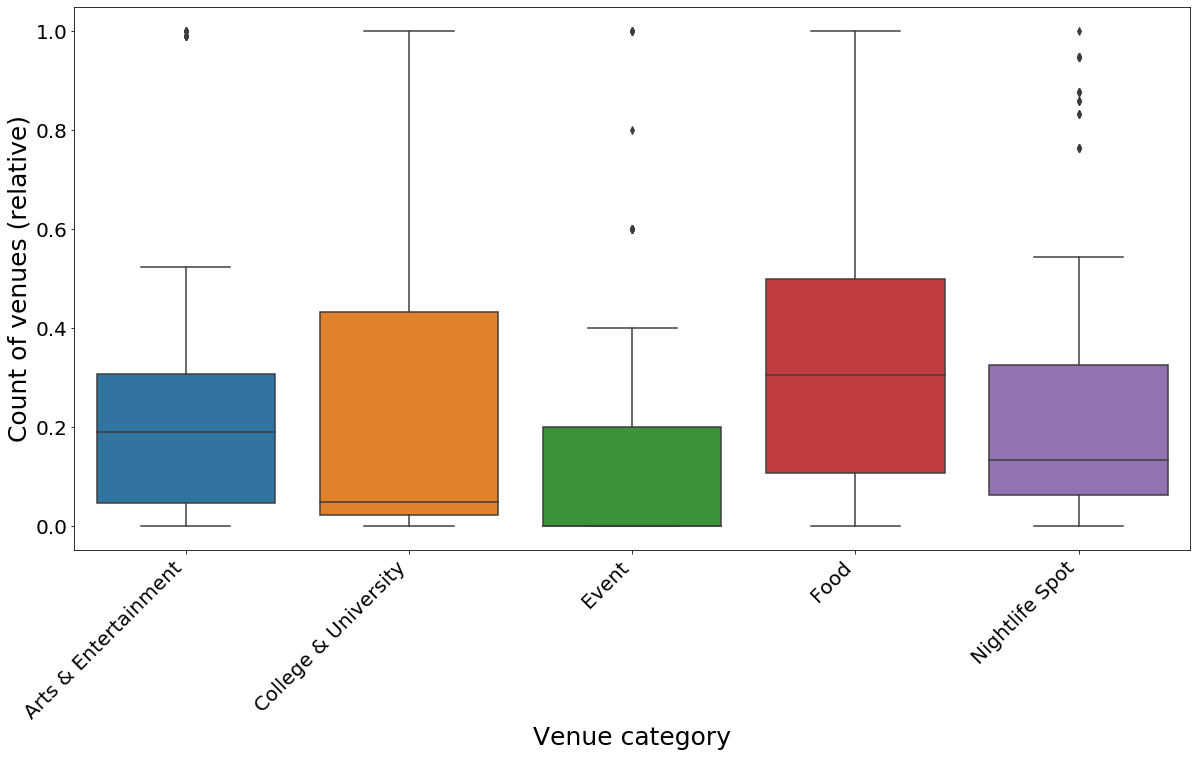

In [93]:
plt.figure(figsize=(20, 10))
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [105]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:2, 1:0, 2:3, 3:1}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = station_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Station'] = station_new['Station']

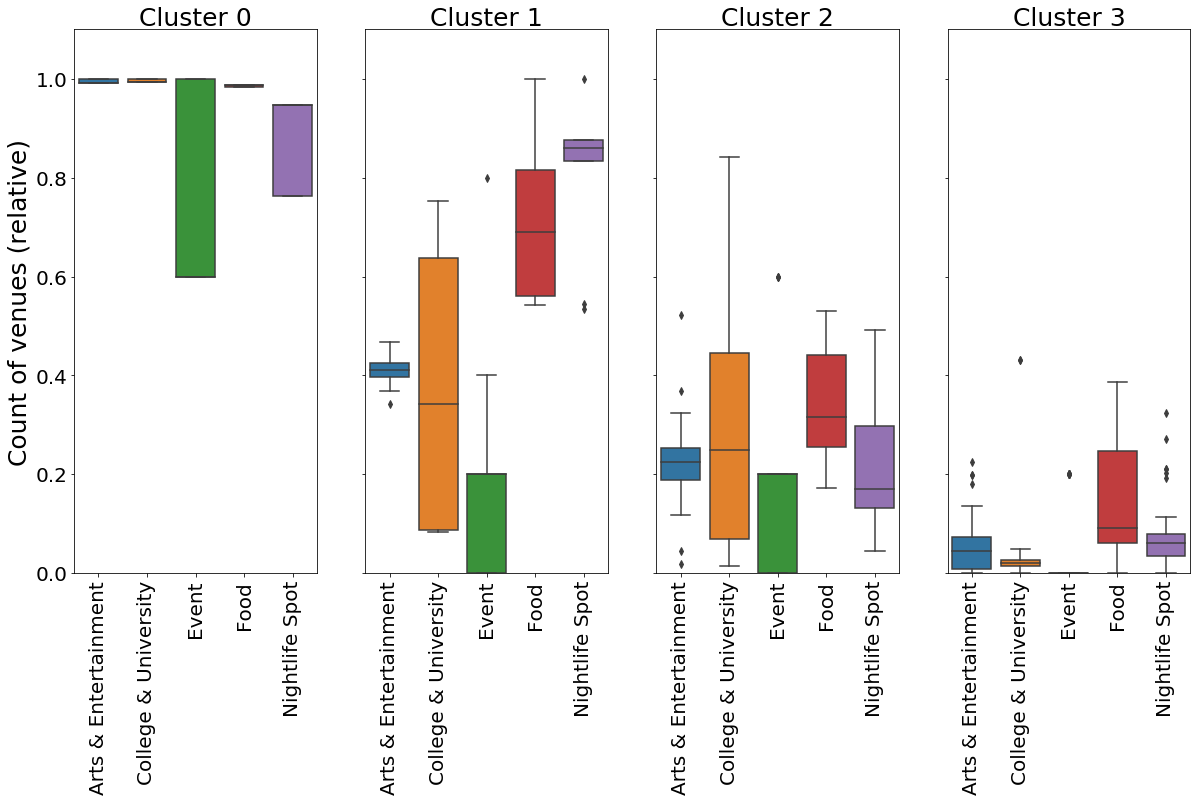

In [106]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()